In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")

In [5]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
28994,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31732,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34771,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37438,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt

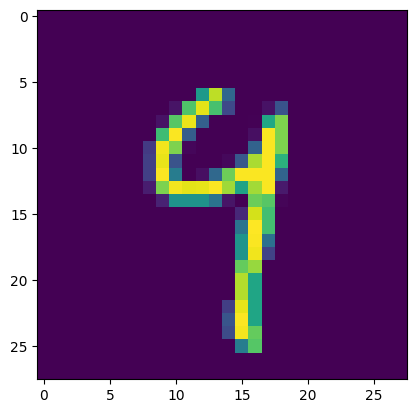

In [8]:
plt.imshow(df.iloc[12231, 1:].values.reshape(28, 28))

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2, random_state=42)

In [10]:
scalar = StandardScaler()

In [13]:
X_train = scalar.fit_transform(X_train)

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)

In [33]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [34]:
X_train.shape

(41998, 100)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = knn.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test, y_pred)

1.0

In [41]:
# transforming in 3d

pca = PCA(n_components=3)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [42]:
X_train

array([[-7.50848817,  1.6077637 , -5.39704318],
       [-4.07553509,  6.28361844, -7.68896711],
       [-3.54858189, -5.10673222, -2.09324948],
       ...,
       [ 2.11429802,  0.87706416, -0.90029899],
       [ 1.05992633,  0.98344266,  3.80650063],
       [17.69368116,  1.70426524, -4.85507143]])

In [43]:
import plotly.express as px

In [45]:
y_train = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train[:, 0], y=X_train[:, 1], z=X_train[:, 2], color=y_train)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()

In [47]:
pca.explained_variance_

array([40.69515728, 29.11175616, 26.78361289])

In [49]:
pca.components_.shape

(3, 100)